# Google Colab Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540 Final Project/Notebooks'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))


Mounted at /content/drive/
['extract_filename_features.py', 'extract_audio_features.py', 'data', 'normalize_data.py', 'svm.ipynb', 'load_train_test_split.ipynb', 'project_proposal.ipynb', 'Neural Network.ipynb', 'pca_and_svm.ipynb']


# Import Statements

In [ ]:
# import needed libraries
from __future__ import absolute_import, division, print_function, unicode_literals

# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import optimizers

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# The load_train_test_split jupyter notebook has useful functions in it for loading the dataset.
# The easiest way to import these functions is to simply run the jupyter notebook
%run "{GOOGLE_DRIVE_PATH}/load_train_test_split.ipynb"

Mounted at /content/drive/
['extract_filename_features.py', 'extract_audio_features.py', 'data', 'normalize_data.py', 'svm.ipynb', 'load_train_test_split.ipynb', 'project_proposal.ipynb', 'Neural Network.ipynb', 'pca_and_svm.ipynb']
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.7/141.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iso-639: filename=iso_639-0.4.5-py3-none-any.whl size=168840 sha256=9fc15288ff878c46a3d72a25d7e4d91c45c84b7497467e6418cc93346e3fedfb
  Stored in directory: /root/.cache/pip/wheels/d8/78/cc/5478ca3b1c3f602eae6f8cdbd78f909

# Neural Network

In [ ]:
def split_features_label(input_df):
  features = input_df.iloc[:, 1:89]
  labels = input_df.iloc[:, 89:]
  return features, labels

def split_labels(labels, label_position=0):
  return labels.iloc[:, 0], labels.iloc[:, 1]

def tvt_mapto1hot():
  # For performing 1-hot on train, val, test
  # and split emotion and intensity labels
  ytrain_emo, ytrain_int = split_labels(y_train_val)
  ytrain_1hot_emo = to_categorical(ytrain_emo)[:, 1:9]
  ytrain_1hot_int = to_categorical(ytrain_int)[:, 1:3]

  yval_emo, yval_int = split_labels(y_val)
  yval_1hot_emo = to_categorical(yval_emo)[:, 1:9]
  yval_1hot_int = to_categorical(yval_int)[:, 1:3]

  ytest_emo, ytest_int = split_labels(y_test_val)
  ytest_1hot_emo = to_categorical(ytest_emo) [:, 1:9]
  ytest_1hot_int = to_categorical(ytest_int)[:, 1:3]

  return ytrain_1hot_emo, ytrain_1hot_int, yval_1hot_emo, yval_1hot_int, ytest_1hot_emo, ytest_1hot_int

def tt_mapto1hot():
  # For performing 1-hot on train, val, test
  # and split emotion and intensity labels
  ytrain_emo, ytrain_int = split_labels(y_train)
  ytrain_1hot_emo = to_categorical(ytrain_emo)[:, 1:9]
  ytrain_1hot_int = to_categorical(ytrain_int)[:, 1:3]

  ytest_emo, ytest_int = split_labels(y_test)
  ytest_1hot_emo = to_categorical(ytest_emo)[:, 1:9]
  ytest_1hot_int = to_categorical(ytest_int)[:, 1:3]

  return ytrain_1hot_emo, ytrain_1hot_int, ytest_1hot_emo, ytest_1hot_int

train, test = gen_train_test_split()

train_val, val, test_val = gen_train_val_test_split()

# 80-20 split (first split features from targets, then perform 1-hot encoding on each of the target columns)
x_train, y_train = split_features_label(train)
x_test, y_test = split_features_label(test)
y_train_1hot_emo, y_train_1hot_int, y_test_1hot_emo, y_test_1hot_int = tt_mapto1hot()

# 60-20-20 split
x_train_val, y_train_val = split_features_label(train_val)
x_val, y_val = split_features_label(val)
x_test, y_test_val = split_features_label(test_val)
y_train_1hot_emo, y_train_1hot_int, y_val_1hot_emo, y_val_1hot_int, y_test_1hot_emo, y_test_1hot_int = tvt_mapto1hot()



In [ ]:
# Use this code to verify dataset
# for i in range(y_train_1hot_int.shape[1]):
#     unique_values = np.unique(y_train_1hot_int[:, i])
#     print(f"Unique values in column {i+1}: {unique_values}")

In [ ]:
# Intensity
layers = [
    Dense(1000, activation='relu'),
    Dropout(0.25),
    Dense(1000, activation='relu'),
    Dense(1000, activation= 'relu'),
    Dropout(0.25),
    Dense(1000, activation= 'relu'),
    Dropout(0.25),
    Dense(1000, activation= 'relu'),
    Dense(1000, activation= 'relu'),
    Dropout(0.25),
    Dense(1000, activation= 'relu'),
    Dropout(0.25),
    Dense(1000, activation='relu'),
    Dense(2, activation='softmax') # 2 for two emotions
]

epochs = 25
learning_rate = 0.1 #0.05 works too, just a little slow
model_int = Sequential(layers)

#refer to https://www.tensorflow.org/tutorials/keras/classification tutorial to check on how to use compile function
model_int.compile(optimizer=optimizers.SGD(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=['accuracy'])

# This will start the training and save each epoch output in the history list.
history = model_int.fit(x_train_val, y_train_1hot_int, batch_size=16, epochs=epochs , validation_data=(x_val, y_val_1hot_int))

Epoch 1/25
53/53 [==============================] - 53s 96ms/step - loss: 0.6954 - accuracy: 0.5179 - val_loss: 0.6863 - val_accuracy: 0.5333
Epoch 2/25
53/53 [==============================] - 6s 106ms/step - loss: 0.6884 - accuracy: 0.5321 - val_loss: 0.6691 - val_accuracy: 0.5400
Epoch 3/25
53/53 [==============================] - 4s 79ms/step - loss: 0.6654 - accuracy: 0.6274 - val_loss: 0.7816 - val_accuracy: 0.4733
Epoch 4/25
53/53 [==============================] - 5s 86ms/step - loss: 0.6261 - accuracy: 0.6595 - val_loss: 0.5707 - val_accuracy: 0.6967
Epoch 5/25
53/53 [==============================] - 5s 103ms/step - loss: 0.6096 - accuracy: 0.6905 - val_loss: 0.5258 - val_accuracy: 0.7400
Epoch 6/25
53/53 [==============================] - 4s 83ms/step - loss: 0.5922 - accuracy: 0.6976 - val_loss: 0.5184 - val_accuracy: 0.7433
Epoch 7/25
53/53 [==============================] - 4s 82ms/step - loss: 0.5695 - accuracy: 0.6964 - val_loss: 0.5573 - val_accuracy: 0.7200
Epoch 8/25

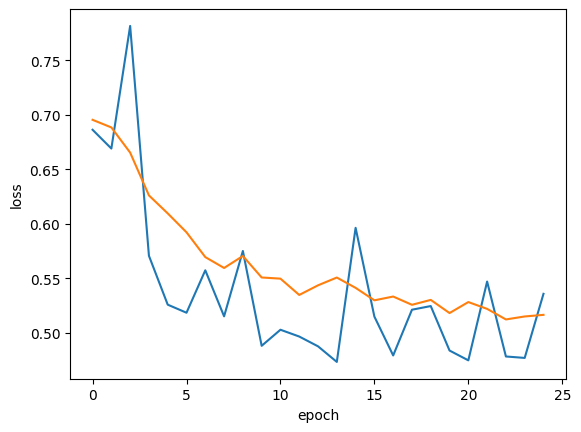

In [ ]:
plt.plot(range(epochs),  history.history['val_loss'])
plt.plot(range(epochs), history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss');

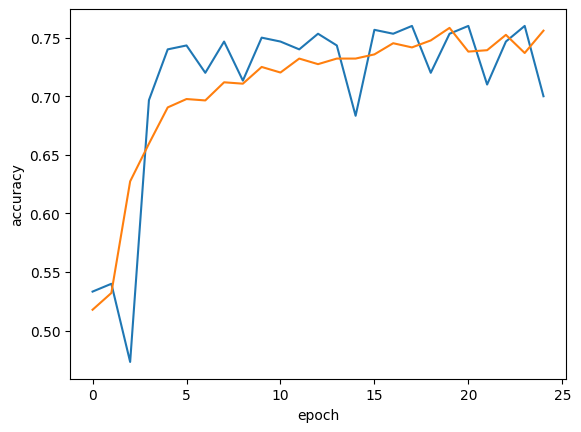

In [ ]:
plt.plot(range(epochs),  history.history['val_accuracy'])
plt.plot(range(epochs), history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy');

The above graphs indicate that a deeper model could work well, but runtime is starting to get too high, especially if making any larger layers,

In [ ]:
# Emotion
layers = [
    Dense(100, activation='relu'),
    Dense(1000, activation='relu'),
    Dropout(0.25),
    Dense(1000, activation='relu'),
    Dropout(0.25),
    Dense(1000),
    Dropout(0.25),
    Dense(100, activation='relu'),
    Dropout(0.25),
    Dense(8, activation='softmax') # needs to be 8 for 8 emotions
]

model_emo = Sequential(layers)

#refer to https://www.tensorflow.org/tutorials/keras/classification tutorial to check on how to use compile function
model_emo.compile(optimizer=optimizers.SGD(learning_rate=0.05), loss="categorical_crossentropy", metrics=['accuracy'])

# This will start the training and save each epoch output in the history list.
history = model_emo.fit(x_train_val, y_train_1hot_emo, batch_size=16, epochs=50 , validation_data=(x_val, y_val_1hot_emo))

Epoch 1/50
53/53 [==============================] - 3s 34ms/step - loss: 2.0542 - accuracy: 0.1738 - val_loss: 2.0095 - val_accuracy: 0.1867
Epoch 2/50
53/53 [==============================] - 2s 34ms/step - loss: 1.9713 - accuracy: 0.2000 - val_loss: 1.8588 - val_accuracy: 0.2567
Epoch 3/50
53/53 [==============================] - 2s 46ms/step - loss: 1.8560 - accuracy: 0.2643 - val_loss: 1.8454 - val_accuracy: 0.2800
Epoch 4/50
53/53 [==============================] - 2s 46ms/step - loss: 1.8056 - accuracy: 0.2821 - val_loss: 1.7469 - val_accuracy: 0.3100
Epoch 5/50
53/53 [==============================] - 2s 30ms/step - loss: 1.7316 - accuracy: 0.3298 - val_loss: 1.7847 - val_accuracy: 0.2667
Epoch 6/50
53/53 [==============================] - 2s 30ms/step - loss: 1.7097 - accuracy: 0.3536 - val_loss: 1.6509 - val_accuracy: 0.3733
Epoch 7/50
53/53 [==============================] - 2s 33ms/step - loss: 1.6596 - accuracy: 0.3702 - val_loss: 1.7355 - val_accuracy: 0.3600
Epoch 8/50
53

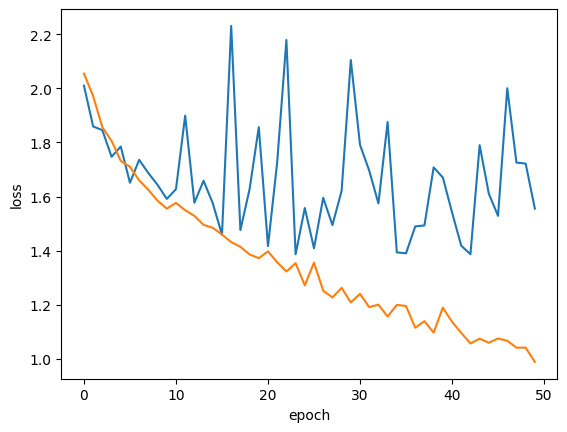

In [ ]:
plt.plot(range(50), history.history['val_loss'])
plt.plot(range(50), history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss');

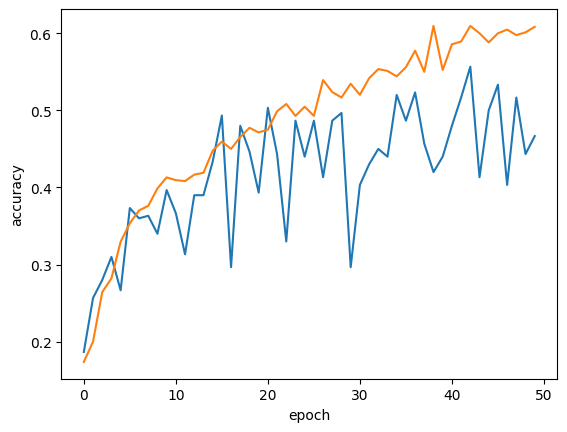

In [ ]:
plt.plot(range(50), history.history['val_accuracy'])
plt.plot(range(50), history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy');

10/10 [==============================] - 0s 16ms/step
Accuracy: 0.47333333333333333
Precision: 0.5586380625124544
Recall: 0.47333333333333333


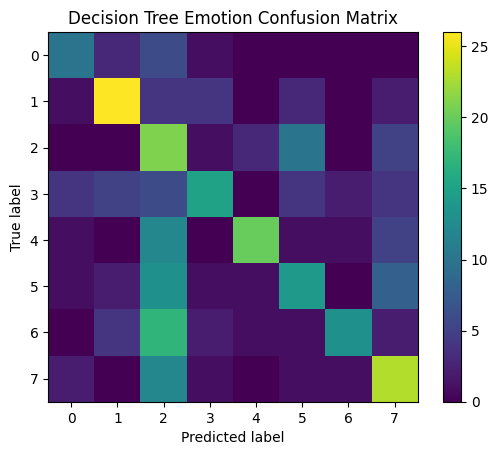

In [ ]:
# Metrics for emotion
y_pred = model_emo.predict(x_test)

# Convert one-hot encoded predictions and true labels back to categorical labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_1hot_emo, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

plt.imshow(conf_matrix)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Neural Network Emotion Confusion Matrix')
plt.colorbar()
plt.show()

10/10 [==============================] - 0s 21ms/step
Accuracy: 0.7466666666666667
Precision: 0.8282485875706215
Recall: 0.7466666666666667


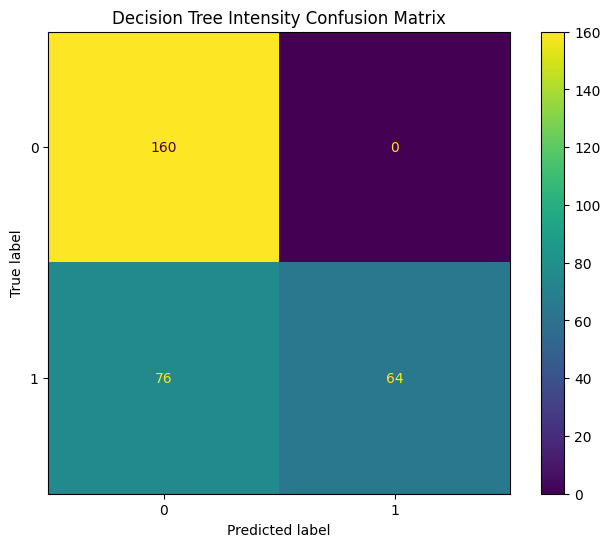

In [ ]:
# Metrics for emotional intensity
y_pred = model_int.predict(x_test)

# Convert one-hot encoded predictions and true labels back to categorical labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_1hot_int, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)

ax.set_title('Neural Network Intensity Confusion Matrix')

plt.show()